# Parselmouth, a tutorial

## Introduction

### Installation

Install Parselmouth by installing the `praat-parselmouth` package from PyPI.

Do not - do or do not? I repeat, do not! - install `parselmouth`, as it is another package. _(Sorry for the confusion.)_

In [3]:
!pip install praat-parselmouth

     |████████████████████████████████| 10.7 MB 11.2 MB/s eta 0:00:01
You should consider upgrading via the '/home/cocco/.virtualenvs/praat/bin/python -m pip install --upgrade pip' command.


And these are some other things you should have installed to run demo:

In [2]:
!pip install numpy matplotlib tgt

     |████████████████████████████████| 16.9 MB 4.5 MB/s eta 0:00:01
     |████████████████████████████████| 11.3 MB 3.7 MB/s eta 0:00:01
     |████████████████████████████████| 3.1 MB 6.5 MB/s eta 0:00:01
     |████████████████████████████████| 930 kB 4.1 MB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 3.8 MB/s eta 0:00:01
  Created wheel for tgt: filename=tgt-1.4.4-py3-none-any.whl size=28929 sha256=ae1d6b06ea7f2800e0bf14525f2e185f442a4763e3e9211a9497aff2b7ec3d18
  Stored in directory: /home/cocco/.cache/pip/wheels/1c/00/d0/f3cef6ba9ea3abb4a7177010fe44931abdd7e49b0ca859d45d
Successfully built tgt
You should consider upgrading via the '/home/cocco/.virtualenvs/praat/bin/python -m pip install --upgrade pip' command.


### Let's get started

In [5]:
import parselmouth

In [6]:
import numpy as np

In [7]:
parselmouth.__version__

'0.4.1'

In [8]:
parselmouth.PRAAT_VERSION, parselmouth.PRAAT_VERSION_DATE

('6.1.38', '2 January 2021')

### What's to come?

- That one example from before
- Fantastic Praat objects and how to plot them
- Accessing "raw" Praat commands
- Running Praat scripts
- Getting annotations from TextGrids
- One language to rule them all: accessing R

**Main goal: how to map a Praat workflow to Parselmouth**

_(in other words: the examples might seem a bit artificial/simplistic, but try to find the principles)_

### Synchronisation point

- Questions/issues/... ?
- https://parselmouth.readthedocs.io/

## That one example from before

In [10]:
import parselmouth

def extract_info(sound):
    pitch = sound.to_pitch(time_step=0.001, pitch_ceiling=300)
    intensity = sound.to_intensity(75, 0.001, subtract_mean=False)

    print("Here are the results:")
    for i in range(int((sound.tmax - sound.tmin) / 0.01)):
        time = sound.tmin + (i + 1) * 0.01
        p_value = pitch.get_value_at_time(time)
        i_value = intensity.get_value(time)
        print("{:.2f} {:.3f} {:.3f}".format(time, p_value, i_value))

extract_info(parselmouth.Sound("data/the_north_wind_and_the_sun.wav"))

Here are the results:
0.01 nan nan
0.02 nan nan
0.03 nan nan
0.04 nan nan
0.05 nan 43.487
0.06 nan 50.350
0.07 nan 61.463
0.08 246.585 71.030
0.09 231.483 76.976
0.10 220.806 79.662
0.11 218.308 79.511
0.12 214.115 77.411
0.13 208.011 76.218
0.14 212.282 77.017
0.15 218.277 77.975
0.16 224.063 78.575
0.17 231.262 78.939
0.18 241.099 79.561
0.19 264.046 81.029
0.20 281.768 82.617
0.21 291.580 83.159
0.22 151.328 82.559
0.23 156.470 81.838
0.24 159.559 81.541
0.25 162.688 80.931
0.26 166.180 79.924
0.27 169.513 79.214
0.28 172.452 78.699
0.29 174.180 77.088
0.30 173.641 73.263
0.31 172.712 66.726
0.32 nan 58.664
0.33 nan 55.580
0.34 nan 55.476
0.35 nan 53.792
0.36 nan 51.121
0.37 nan 51.635
0.38 nan 55.454
0.39 nan 58.499
0.40 nan 60.273
0.41 nan 62.286
0.42 nan 62.800
0.43 nan 59.783
0.44 nan 53.562
0.45 nan 62.812
0.46 nan 72.509
0.47 nan 77.916
0.48 236.954 80.497
0.49 234.159 81.608
0.50 231.957 82.054
0.51 229.707 82.021
0.52 226.927 81.493
0.53 224.257 80.323
0.54 219.057 78.394
0.

### Let's break that up into pieces

In [1]:
import parselmouth

def extract_info(sound):
    pitch = sound.to_pitch(time_step=0.001, pitch_ceiling=300)
    intensity = sound.to_intensity(75, 0.001, subtract_mean=False)

    print("Here are the results:")
    for i in range(int((sound.tmax - sound.tmin) / 0.01)):
        time = sound.tmin + (i + 1) * 0.01
        p_value = pitch.get_value_at_time(time)
        i_value = intensity.get_value(time)
        print("{:.2f} {:.3f} {:.3f}".format(time, p_value, i_value))

extract_info(parselmouth.Sound("data/the_north_wind_and_the_sun.wav"))

PraatError: Cannot open file “/home/cocco/Documents/Research/ASealR/data/the_north_wind_and_the_sun.wav”.
Sound not read from sound file “/home/cocco/Documents/Research/ASealR/data/the_north_wind_and_the_sun.wav”.

In [11]:
sound = parselmouth.Sound("data/the_north_wind_and_the_sun.wav")

In [12]:
sound

In [13]:
print(sound)

Object type: Sound
Object name: <no name>
Date: Fri Jun  3 13:38:16 2022

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 1.283265306122449 seconds
   Total duration: 1.283265306122449 seconds
Time sampling:
   Number of samples: 56592
   Sampling period: 2.2675736961451248e-05 seconds
   Sampling frequency: 44100 Hz
   First sample centred at: 1.1337868480725624e-05 seconds
Amplitude:
   Minimum: -0.595245361 Pascal
   Maximum: 0.543609619 Pascal
   Mean: -5.52036414e-06 Pascal
   Root-mean-square: 0.12177943 Pascal
Total energy: 0.0190311191 Pascal² sec (energy in air: 4.75777977e-05 Joule/m²)
Mean power (intensity) in air: 3.70755739e-05 Watt/m² = 75.69 dB
Standard deviation in channel 1: 0.121780506 Pascal



### Seems familiar?

![praat_objects_and_info.png](images/praat_objects_and_info.png)

### Intensity and Pitch

In [14]:
pitch = sound.to_pitch(time_step=0.001, pitch_ceiling=300)
pitch

In [15]:
pitch.get_value_at_time(0.5)

231.9568320010321

![praat_pitch_value.png](images/praat_pitch_get_value.png)

![praat_pitch_value.png](images/praat_pitch_value.png)

In [16]:
intensity = sound.to_intensity(75, 0.001, subtract_mean=False)
intensity


In [17]:
intensity.get_value(0.5)

82.05439009429837

In [18]:
sound.tmin, sound.tmax

(0.0, 1.283265306122449)

### And that's all Python-Praat interaction

The rest is Python!

In [19]:
import parselmouth

def extract_info(sound):
    pitch = sound.to_pitch(time_step=0.001, pitch_ceiling=300)
    intensity = sound.to_intensity(75, 0.001, subtract_mean=False)

    print("Here are the results:")
    for i in range(int((sound.tmax - sound.tmin) / 0.01)):
        time = sound.tmin + (i + 1) * 0.01
        p_value = pitch.get_value_at_time(time)
        i_value = intensity.get_value(time)
        print("{:.2f} {:.3f} {:.3f}".format(time, p_value, i_value))

extract_info(parselmouth.Sound("data/the_north_wind_and_the_sun.wav"))

Here are the results:
0.01 nan nan
0.02 nan nan
0.03 nan nan
0.04 nan nan
0.05 nan 43.487
0.06 nan 50.350
0.07 nan 61.463
0.08 246.585 71.030
0.09 231.483 76.976
0.10 220.806 79.662
0.11 218.308 79.511
0.12 214.115 77.411
0.13 208.011 76.218
0.14 212.282 77.017
0.15 218.277 77.975
0.16 224.063 78.575
0.17 231.262 78.939
0.18 241.099 79.561
0.19 264.046 81.029
0.20 281.768 82.617
0.21 291.580 83.159
0.22 151.328 82.559
0.23 156.470 81.838
0.24 159.559 81.541
0.25 162.688 80.931
0.26 166.180 79.924
0.27 169.513 79.214
0.28 172.452 78.699
0.29 174.180 77.088
0.30 173.641 73.263
0.31 172.712 66.726
0.32 nan 58.664
0.33 nan 55.580
0.34 nan 55.476
0.35 nan 53.792
0.36 nan 51.121
0.37 nan 51.635
0.38 nan 55.454
0.39 nan 58.499
0.40 nan 60.273
0.41 nan 62.286
0.42 nan 62.800
0.43 nan 59.783
0.44 nan 53.562
0.45 nan 62.812
0.46 nan 72.509
0.47 nan 77.916
0.48 236.954 80.497
0.49 234.159 81.608
0.50 231.957 82.054
0.51 229.707 82.021
0.52 226.927 81.493
0.53 224.257 80.323
0.54 219.057 78.394
0.

### Synchronisation point

- https://parselmouth.readthedocs.io/en/stable/api_reference.html#parselmouth.Sound
- Change pitch/intensity extraction step to auto
- Extract formant analysis and print first 2 formants

## Fantastic Praat objects and how to plot them

Two goals at once:
1. How to make nice plots and integrate Praat (Parselmouth) into Python plotting libraries
2. How to access the actual data to be plotting **(!)**

In [20]:
sound = parselmouth.Sound("data/the_north_wind_and_the_sun.wav")  # Or "data/hoover.wav"
sound

In [21]:
help(sound.get_value)

Help on method get_value in module parselmouth:

get_value(...) method of parselmouth.Sound instance
    get_value(self: parselmouth.Vector, x: float, channel: Optional[int] = None, interpolation: parselmouth.ValueInterpolation = <ValueInterpolation.CUBIC: 2>) -> float



In [22]:
sound.n_channels

1

In [23]:
sound.get_value(0.5, 1)

0.10117530822753906

In [24]:
sound.values

array([[ 0.00109863,  0.00085449,  0.00119019, ..., -0.01229858,
        -0.01345825, -0.01382446]])

In [25]:
type(sound.values), sound.values.shape

(numpy.ndarray, (1, 56592))

In [26]:
sound.values[0,:-100:2]

array([0.00109863, 0.00119019, 0.00073242, ..., 0.03112793, 0.03814697,
       0.04415894])

In [27]:
parselmouth.Sound.__mro__  # Subclass of parselmouth.Matrix

(parselmouth.Sound,
 parselmouth.TimeFrameSampled,
 parselmouth.TimeFunction,
 parselmouth.Vector,
 parselmouth.Matrix,
 parselmouth.SampledXY,
 parselmouth.Sampled,
 parselmouth.Function,
 parselmouth.Data,
 parselmouth.Thing,
 pybind11_builtins.pybind11_object,
 object)

In [28]:
from IPython.display import Audio

Audio(sound.values, rate=sound.sampling_frequency)

In [29]:
def audio_player(sound):
    return Audio(sound.values, rate=sound.sampling_frequency)

### Plotting the waveform

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [9, 6]
plt.rcParams['figure.dpi'] = 100

In [31]:
sound.values[0,:]

array([ 0.00109863,  0.00085449,  0.00119019, ..., -0.01229858,
       -0.01345825, -0.01382446])

In [32]:
sound.x1 + np.arange(sound.nx) * sound.dx

array([1.13378685e-05, 3.40136054e-05, 5.66893424e-05, ...,
       1.28320862e+00, 1.28323129e+00, 1.28325397e+00])

In [33]:
sound.xs()

array([1.13378685e-05, 3.40136054e-05, 5.66893424e-05, ...,
       1.28320862e+00, 1.28323129e+00, 1.28325397e+00])

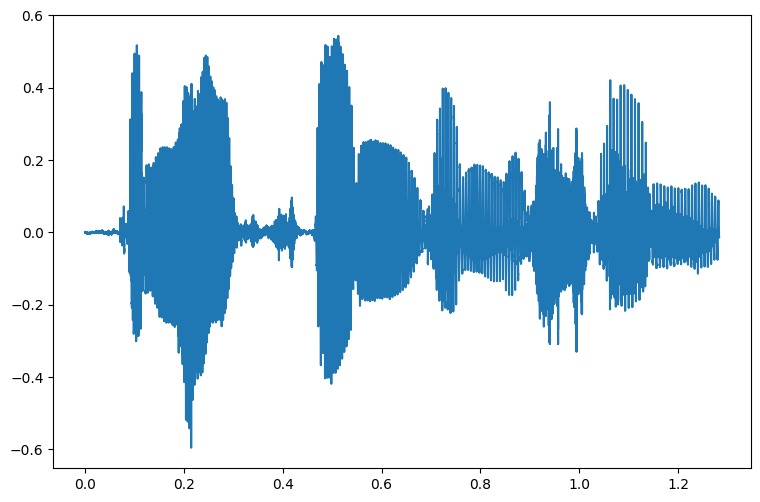

In [34]:
fig, ax = plt.subplots()
ax.plot(sound.xs(), sound.values[0,:])

(-1.0, 1.0)

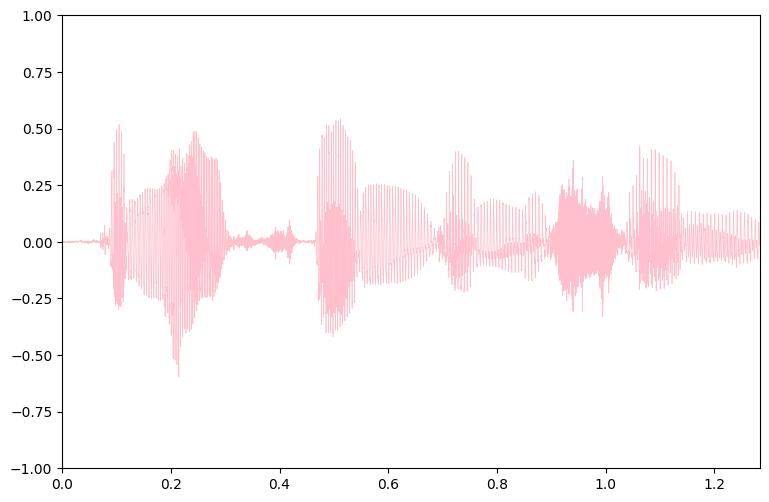

In [104]:
fig, ax = plt.subplots()
ax.plot(sound.xs(), sound.values[0,:], color='pink', linewidth=0.5)
ax.set_xlim(sound.xmin, sound.xmax)
ax.set_ylim(-1, 1)

In [36]:
sun_sound = sound.extract_part(from_time=0.9, preserve_times=True)
audio_player(sun_sound)

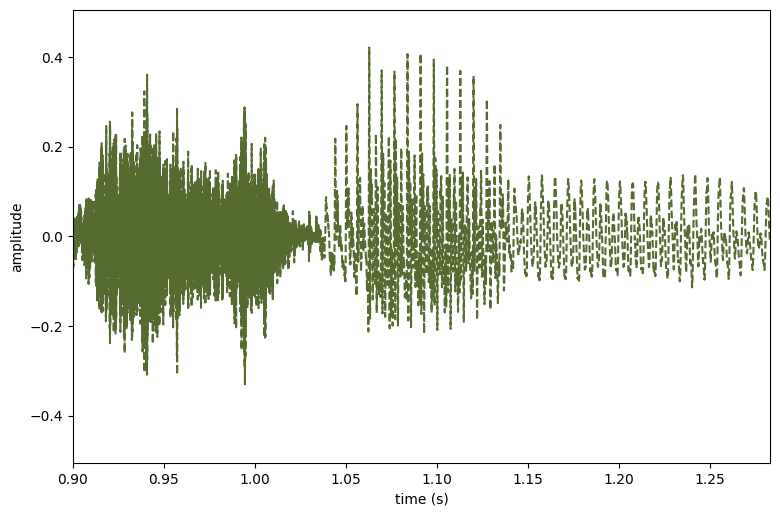

In [37]:
def plot_waveform(ax, sound, **kwargs):
    max_abs_val = np.max(np.abs(sun_sound.values))
    ax.plot(sun_sound.xs(), sun_sound.values[0,:], **kwargs)
    ax.set_xlim(sound.xmin, sound.xmax)
    ax.set_ylim(-1.2 * max_abs_val, 1.2 * max_abs_val)
    ax.set_xlabel("time (s)")
    ax.set_ylabel("amplitude")

fig, ax = plt.subplots()
plot_waveform(ax, sun_sound, linestyle='--', color='darkolivegreen')

### And now a spectrogram

In [38]:
spectrogram = sound.to_spectrogram(window_length=0.03)
spectrogram

In [39]:
help(sound.to_spectrogram)

Help on method to_spectrogram in module parselmouth:

to_spectrogram(...) method of parselmouth.Sound instance
    to_spectrogram(self: parselmouth.Sound, window_length: Positive[float] = 0.005, maximum_frequency: Positive[float] = 5000.0, time_step: Positive[float] = 0.002, frequency_step: Positive[float] = 20.0, window_shape: parselmouth.SpectralAnalysisWindowShape = <SpectralAnalysisWindowShape.GAUSSIAN: 5>) -> parselmouth.Spectrogram



In [40]:
isinstance(spectrogram, parselmouth.Matrix), issubclass(parselmouth.Spectrogram, parselmouth.Matrix)

(True, True)

In [41]:
spectrogram.values

array([[5.77058130e-04, 4.46078727e-04, 2.16306505e-04, ...,
        6.51102944e-05, 2.30870407e-04, 3.59695390e-04],
       [5.89666688e-04, 5.03549291e-04, 3.28302679e-04, ...,
        1.63711052e-04, 3.12465073e-04, 4.24357287e-04],
       [5.86604303e-04, 6.04486097e-04, 5.54362150e-04, ...,
        4.16753797e-04, 5.24666549e-04, 5.98897063e-04],
       ...,
       [2.39808235e-07, 1.23539411e-07, 3.14752356e-08, ...,
        3.81966016e-06, 3.17324427e-06, 2.20709348e-06],
       [2.90069287e-07, 1.51267010e-07, 4.63170373e-08, ...,
        4.11004419e-06, 3.42932933e-06, 2.52327331e-06],
       [3.92098243e-07, 2.91015188e-07, 2.11622488e-07, ...,
        3.69593768e-06, 3.14417036e-06, 2.45440128e-06]])

In [42]:
spectrogram.values.shape, spectrogram.values.size

((464, 579), 268656)

In [43]:
spectrogram.values.base

In [44]:
spectrogram.xs().shape, spectrogram.xs()

((579,),
 array([0.03019219, 0.0323079 , 0.03442361, 0.03653932, 0.03865504,
        0.04077075, 0.04288646, 0.04500217, 0.04711788, 0.04923359,
        0.0513493 , 0.05346501, 0.05558072, 0.05769643, 0.05981215,
        0.06192786, 0.06404357, 0.06615928, 0.06827499, 0.0703907 ,
        0.07250641, 0.07462212, 0.07673783, 0.07885354, 0.08096925,
        0.08308497, 0.08520068, 0.08731639, 0.0894321 , 0.09154781,
        0.09366352, 0.09577923, 0.09789494, 0.10001065, 0.10212636,
        0.10424207, 0.10635779, 0.1084735 , 0.11058921, 0.11270492,
        0.11482063, 0.11693634, 0.11905205, 0.12116776, 0.12328347,
        0.12539918, 0.1275149 , 0.12963061, 0.13174632, 0.13386203,
        0.13597774, 0.13809345, 0.14020916, 0.14232487, 0.14444058,
        0.14655629, 0.148672  , 0.15078772, 0.15290343, 0.15501914,
        0.15713485, 0.15925056, 0.16136627, 0.16348198, 0.16559769,
        0.1677134 , 0.16982911, 0.17194482, 0.17406054, 0.17617625,
        0.17829196, 0.18040767, 0.18252

In [58]:
spectrogram.x_grid().shape, spectrogram.x_grid()

((580,),
 array([0.02913434, 0.03125005, 0.03336576, 0.03548147, 0.03759718,
        0.03971289, 0.0418286 , 0.04394431, 0.04606002, 0.04817573,
        0.05029145, 0.05240716, 0.05452287, 0.05663858, 0.05875429,
        0.06087   , 0.06298571, 0.06510142, 0.06721713, 0.06933284,
        0.07144856, 0.07356427, 0.07567998, 0.07779569, 0.0799114 ,
        0.08202711, 0.08414282, 0.08625853, 0.08837424, 0.09048995,
        0.09260566, 0.09472138, 0.09683709, 0.0989528 , 0.10106851,
        0.10318422, 0.10529993, 0.10741564, 0.10953135, 0.11164706,
        0.11376277, 0.11587848, 0.1179942 , 0.12010991, 0.12222562,
        0.12434133, 0.12645704, 0.12857275, 0.13068846, 0.13280417,
        0.13491988, 0.13703559, 0.13915131, 0.14126702, 0.14338273,
        0.14549844, 0.14761415, 0.14972986, 0.15184557, 0.15396128,
        0.15607699, 0.1581927 , 0.16030841, 0.16242413, 0.16453984,
        0.16665555, 0.16877126, 0.17088697, 0.17300268, 0.17511839,
        0.1772341 , 0.17934981, 0.18146

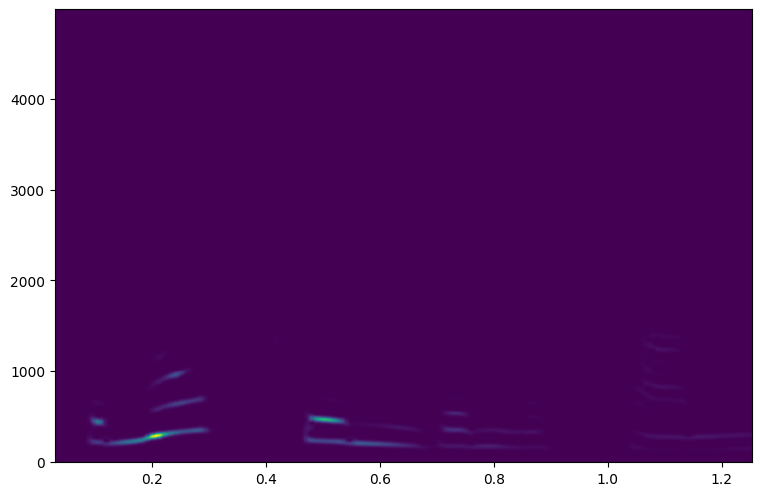

In [59]:
fig, ax = plt.subplots()
ax.pcolormesh(spectrogram.x_grid(), spectrogram.
              y_grid(), spectrogram.values)

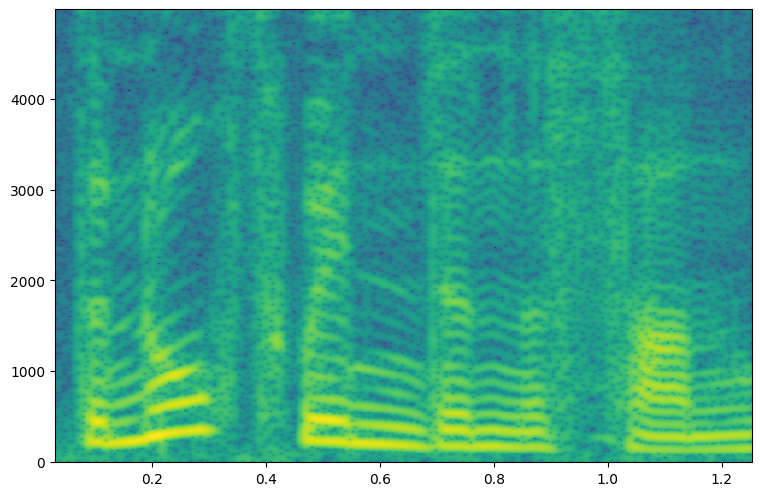

In [60]:
fig, ax = plt.subplots()
ax.pcolormesh(spectrogram.x_grid(), spectrogram.y_grid(), 10 * np.log10(spectrogram.values))

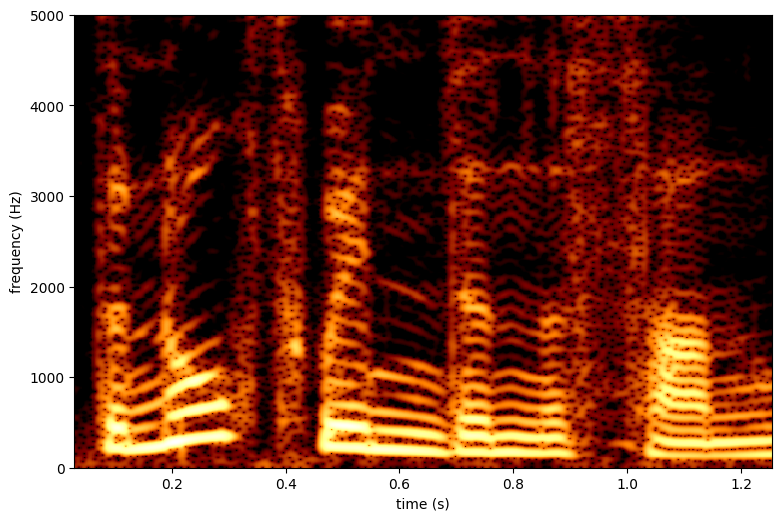

In [61]:
def draw_spectrogram(ax, spectrogram, dynamic_range=70, cmap='afmhot'):
    X, Y = spectrogram.x_grid(), spectrogram.y_grid()
    sg_db = 10 * np.log10(spectrogram.values)
    ax.pcolormesh(X, Y, sg_db, vmin=sg_db.max() - dynamic_range, cmap=cmap)
    ax.set_ylim(spectrogram.ymin, spectrogram.ymax)
    ax.set_xlabel("time (s)")
    ax.set_ylabel("frequency (Hz)")
    
fig, ax = plt.subplots()
draw_spectrogram(ax, spectrogram)

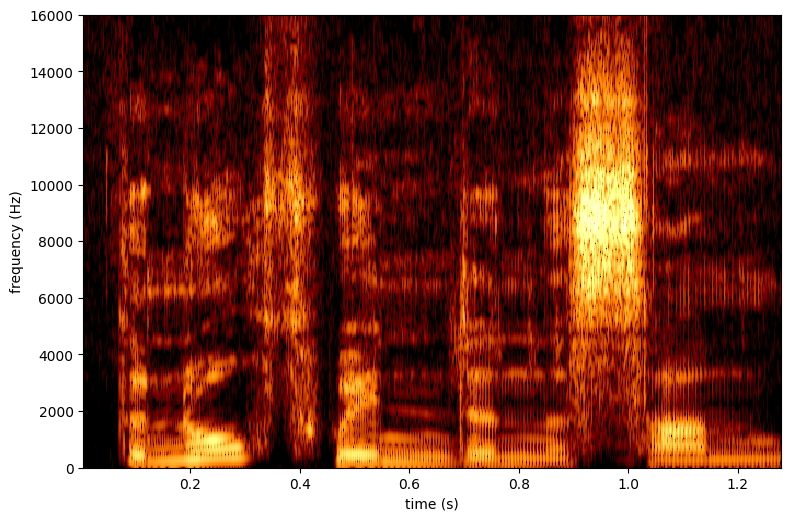

In [62]:
fig, ax = plt.subplots()
pre_emphasized_sound = sound.copy()
pre_emphasized_sound.pre_emphasize()
draw_spectrogram(ax, pre_emphasized_sound.to_spectrogram(window_length=0.005, maximum_frequency=16000))

### And the pitch contour

In [63]:
pitch = sound.to_pitch()
pitch

In [66]:
try:
    pitch.values
except Exception as e:
    import traceback
    traceback.print_exc()

Traceback (most recent call last):
  File "/tmp/ipykernel_15265/1665569425.py", line 2, in <cell line: 1>
    pitch.values
AttributeError: 'parselmouth.Pitch' object has no attribute 'values'


In [67]:
pitch.get_frame(20)

In [68]:
pitch.get_frame(20).candidates

In [69]:
pitch.get_frame(20).candidates[0].frequency

293.09087794771966

![praat_pitch_candidates.png](images/praat_pitch_candidates.png)

In [55]:
pitch.selected_array

array([(  0.        , 0.        ), (  0.        , 0.        ),
       (  0.        , 0.        ), (  0.        , 0.        ),
       (  0.        , 0.        ), (  0.        , 0.        ),
       (245.46350824, 0.59296166), (228.46732333, 0.71642924),
       (220.2298819 , 0.91080297), (217.94941178, 0.910842  ),
       (212.32120095, 0.76900399), (208.42371078, 0.94910003),
       (213.32102922, 0.98839029), (219.2216417 , 0.99161906),
       (225.08564349, 0.99254428), (232.5801842 , 0.9905478 ),
       (243.61028547, 0.96609272), (267.95866739, 0.92669651),
       (283.57192373, 0.96365865), (293.09087795, 0.96865144),
       (303.97165585, 0.96409842), (314.168125  , 0.98060471),
       (320.11744148, 0.98142614), (326.34395014, 0.9806587 ),
       (333.36323873, 0.98896539), (340.02779223, 0.99224632),
       (345.8240749 , 0.98655584), (348.57743419, 0.97695187),
       (346.96653441, 0.95880121), (346.53179322, 0.81325684),
       (  0.        , 0.        ), (  0.        , 0.   

In [56]:
def draw_pitch(ax, pitch):
    # Extract selected pitch contour, and replace unvoiced samples by NaN to not plot
    pitch_values = pitch.selected_array['frequency']
    pitch_values[pitch_values==0] = np.nan
    ax.plot(pitch.xs(), pitch_values, 'o', markersize=5, color='w')
    ax.plot(pitch.xs(), pitch_values, 'o', markersize=2)
    ax.grid(False)
    ax.set_ylim(0, pitch.ceiling)
    ax.set_ylabel("fundamental frequency (Hz)")

(0.0, 1.283265306122449)

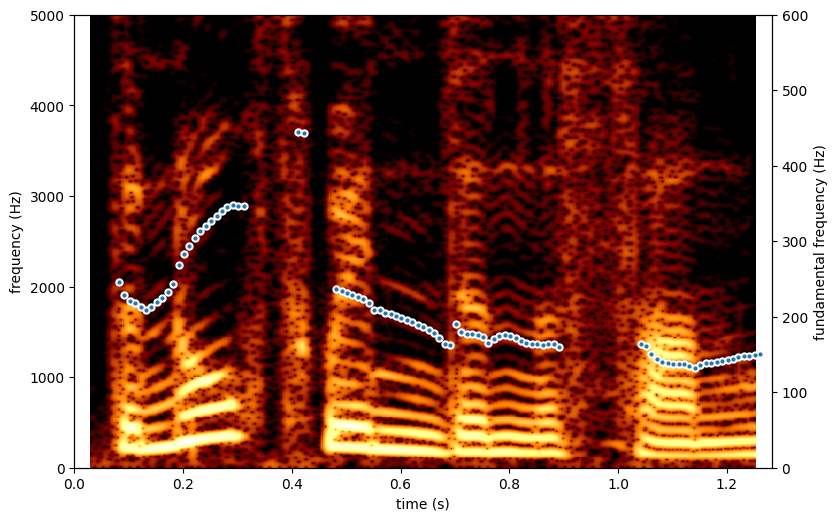

In [57]:
fig, ax = plt.subplots()
draw_spectrogram(ax, spectrogram)
ax_twin = ax.twinx()
draw_pitch(ax_twin, pitch)
ax.set_xlim(sound.xmin, sound.xmax)

In [70]:
hoover_sound = parselmouth.Sound("data/hoover.wav")
audio_player(hoover_sound)

(0.0, 5.720833333333333)

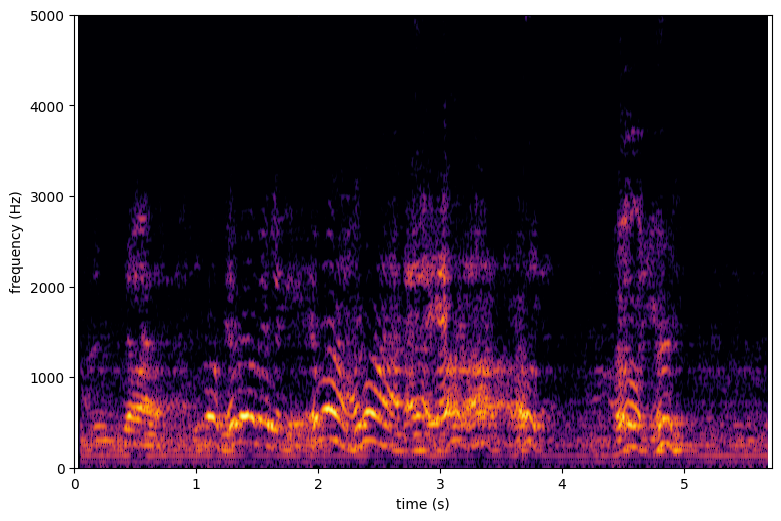

In [71]:
fig, ax = plt.subplots()
draw_spectrogram(ax, hoover_sound.to_spectrogram(window_length=0.03), dynamic_range=50, cmap='inferno')
ax.set_xlim(hoover_sound.xmin, hoover_sound.xmax)

### Synchronisation point

- https://parselmouth.readthedocs.io/en/stable/examples/plotting.html
- Play around with styles and colors and colormaps
- Plot a formant track

## Accessing "raw" Praat commands

Creating a Python interface is quite a bit of work. See source ;-)

What to do when no Python class exists?

In [72]:
manipulation = parselmouth.praat.call(sound, "To Manipulation", 0.01, 75, 600)
manipulation

In [73]:
type(manipulation), type(sound)

(parselmouth.Data, parselmouth.Sound)

In [76]:
parselmouth.Sound.__mro__

(parselmouth.Sound,
 parselmouth.TimeFrameSampled,
 parselmouth.TimeFunction,
 parselmouth.Vector,
 parselmouth.Matrix,
 parselmouth.SampledXY,
 parselmouth.Sampled,
 parselmouth.Function,
 parselmouth.Data,
 parselmouth.Thing,
 pybind11_builtins.pybind11_object,
 object)

In [77]:
help(parselmouth.Data)

Help on class Data in module parselmouth:

class Data(Thing)
 |  Method resolution order:
 |      Data
 |      Thing
 |      pybind11_builtins.pybind11_object
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __copy__(...)
 |      __copy__(self: parselmouth.Data) -> parselmouth.Data
 |  
 |  __deepcopy__(...)
 |      __deepcopy__(self: parselmouth.Data, memo: dict) -> parselmouth.Data
 |  
 |  __eq__(...)
 |      __eq__(self: parselmouth.Data, other: parselmouth.Data) -> bool
 |  
 |  __init__(self, /, *args, **kwargs)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __ne__(...)
 |      __ne__(self: parselmouth.Data, other: parselmouth.Data) -> bool
 |  
 |  copy(...)
 |      copy(self: parselmouth.Data) -> parselmouth.Data
 |  
 |  save(...)
 |      save(self: parselmouth.Data, file_path: str, format: parselmouth.Data.FileFormat = <FileFormat.TEXT: 0>) -> None
 |  
 |  save_as_binary_file(...)
 |      save_as_binary_file(self: parselmouth.D

In [78]:
manipulation.class_name

'Manipulation'

`parselmouth.Data` is the base class of all Praat objects (actually `parselmouth.Thing`; it's complicated).

When the full type is not exposed in Parselmouth, you get a `parselmouth.Data`.

https://parselmouth.readthedocs.io/en/stable/api_reference.html#parselmouth.praat.call

In [79]:
help(parselmouth.praat.call)

Help on built-in function call in module parselmouth.praat:

call(...) method of builtins.PyCapsule instance
    call(command: str, *args, **kwargs) -> object \
    call(object: parselmouth.Data, command: str, *args, **kwargs) -> object \
    call(objects: List[parselmouth.Data], command: str, *args, **kwargs) -> object
    
    Call a Praat command.
    
    This function provides a Python interface to call available Praat commands
    based on the label in the Praat user interface and documentation, similar
    to the Praat scripting language.
    
    Calling a Praat command through this function roughly corresponds to the
    following scenario in the Praat user interface or scripting language:
    
    1. Zero, one, or multiple `parselmouth.Data` objects are put into Praat's
       global object list and are 'selected'.
    2. The Python argument values are converted into Praat values; see below.
    3. The Praat command is executed on the selected objects with the converted
     

In [80]:
audio_player(sound)

In [81]:
from parselmouth.praat import call

manipulation = call(sound, "To Manipulation", 0.01, 75, 600)

pitch_tier = call(manipulation, "Extract pitch tier")

call(pitch_tier, "Multiply frequencies", sound.xmin, sound.xmax, 2)

call([pitch_tier, manipulation], "Replace pitch tier")
sound_octave_up = call(manipulation, "Get resynthesis (overlap-add)")
sound_octave_up

In [82]:
audio_player(sound_octave_up)

In [83]:
try:
    call(sound, "View & Edit")
except Exception as e:
    import traceback
    traceback.print_exc()

Traceback (most recent call last):
  File "/tmp/ipykernel_15265/228740269.py", line 2, in <cell line: 1>
    call(sound, "View & Edit")
parselmouth.PraatError: Cannot view or edit a Sound from batch.


Not supported:
- Interactive "View & Edit" and menus: see main menu
- Drawing: hopefully future interaction with matplotlib

### Synchronization point

- https://parselmouth.readthedocs.io/en/stable/api_reference.html#parselmouth.praat.call
- https://parselmouth.readthedocs.io/en/stable/examples/pitch_manipulation.html
- Is your favorite/most-used piece of Praat functionality available? Can you call it?

## Running Praat scripts

Running praat scripts is very similar to running a single Praat command. A run has two kinds of inputs:
- selected Praat objects
- argument values for Praat `form` parameters

Contrary to actions, a script can have three kinds of outputs:
- Praat objects
- printed output (optional)
- variables (optional)

Same rule as for actions: no interactive stuff. We're programming, after all, not running the GUI.

https://parselmouth.readthedocs.io/en/stable/api_reference.html#parselmouth.praat.run

In [84]:
praat_script = """\
form Increase the pitch by 1 octave
    positive Pitch_floor 75
    positive Pitch_ceiling 600
endform

sound = selected()

manipulation = To Manipulation: 0.01, pitch_floor, pitch_ceiling

pitch_tier = Extract pitch tier

select sound
xmin = Get start time
xmax = Get end time

appendInfoLine: "xmin = ", xmin
appendInfoLine: "xmax = ", xmax

select pitch_tier
Multiply frequencies: xmin, xmax, 2

select pitch_tier
plus manipulation
Replace pitch tier

select manipulation
Get resynthesis (overlap-add)
"""

In [85]:
parselmouth.praat.run(sound, praat_script, 75, 600)

xmin = 0
xmax = 1.283265306122449


In [86]:
praat_script_bis = praat_script + """\
select manipulation
plus pitch_tier
plus sound
"""

In [87]:
parselmouth.praat.run(sound, praat_script, 75, 600, capture_output=True)

([<parselmouth.Sound at 0x7f40d807ecb0>],
 'xmin = 0\nxmax = 1.283265306122449\n')

In [88]:
objects, output = parselmouth.praat.run(sound, praat_script, 75, 600, capture_output=True)
print(output)

xmin = 0
xmax = 1.283265306122449



In [89]:
objects, variables = parselmouth.praat.run(sound, praat_script, 75, 600, return_variables=True)
variables

xmin = 0
xmax = 1.283265306122449


{'sound': 1.0,
 'praatVersion': 6138.0,
 'praatVersion$': '6.1.38',
 'Pitch_floor': 75.0,
 'average': 0.0,
 'left': 1.0,
 'manipulation': 2.0,
 'mono': 1.0,
 'right': 2.0,
 'unix': 1.0,
 'newline$': '\n',
 'shellDirectory$': '/home/cocco/praat_tutorial/IMPRS-2022-Parselmouth-tutorial',
 'temporaryDirectory$': '/home/cocco',
 'pitch_tier': 3.0,
 'Pitch_ceiling': 600.0,
 'all': 0.0,
 'xmin': 0.0,
 'pitch_floor': 75.0,
 'windows': 0.0,
 'xmax': 1.283265306122449,
 'preferencesDirectory$': '',
 'defaultDirectory$': '/home/cocco/praat_tutorial/IMPRS-2022-Parselmouth-tutorial',
 'tab$': '\t',
 'homeDirectory$': '/home/cocco',
 'pitch_ceiling': 600.0,
 'stereo': 2.0,
 'macintosh': 0.0}

### Re-using "legacy" Praat code

It is reasonably simple to reuse an existing piece of Praat code. Often, a few changes at the start and end are enough.

For example, let's take the existing "Praat Script Syllable Nuclei v2" script. (De Jong, N. H., & Wempe, T. (2009). Praat script to detect syllable nuclei and measure speech rate automatically. _Behavior Research Methods, 41_, 385–390.)

Compare `data/syllable_nuclei_orig.praat` and `data/syllable_nuclei.praat`.

![syllable_nuclei_diff_1.png](images/syllable_nuclei_diff_1.png)

![syllable_nuclei_diff_2.png](images/syllable_nuclei_diff_2.png)

In [90]:
def extract_syllable_intervals(file_name):
    print("Extracting syllable intervals from '{}'...".format(file_name))

    objects = parselmouth.praat.run_file("data/syllable_nuclei.praat", -25, 2, 0.3, file_name)
    text_grid = objects[1]
    n = parselmouth.praat.call(text_grid, "Get number of points", 1)
    syllable_nuclei = [parselmouth.praat.call(text_grid, "Get time of point", 1, i + 1) for i in range(n)]

    syllable_intervals = np.diff(syllable_nuclei)
    return syllable_nuclei, syllable_intervals

In [91]:
nuclei, intervals = extract_syllable_intervals("the_north_wind_and_the_sun.wav")

Extracting syllable intervals from 'the_north_wind_and_the_sun.wav'...


In [92]:
nuclei

[0.21141393417940385,
 0.49664520942609675,
 0.580174916643672,
 0.734813006607356,
 0.8646064228385167]

In [93]:
intervals

array([0.28523128, 0.08352971, 0.15463809, 0.12979342])

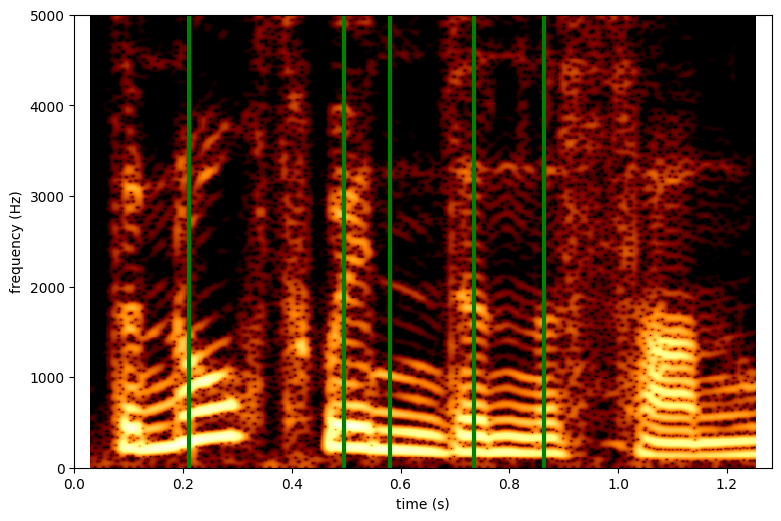

In [94]:
fig, ax = plt.subplots()
draw_spectrogram(ax, sound.to_spectrogram(window_length=0.03))
ax.set_xlim(sound.xmin, sound.xmax)
for nucleus in nuclei:
    ax.axvline(nucleus, color='green', linewidth=3)

### Synchronization point

- https://parselmouth.readthedocs.io/en/stable/api_reference.html#parselmouth.praat.run
- https://parselmouth.readthedocs.io/en/stable/api_reference.html#parselmouth.praat.run_script
- Run a script from http://www.praatvocaltoolkit.com/
- Any own Praat scripts to run?

## Getting annotations from TextGrids

### TextGridTools

There is no full support for TextGrids in Parselmouth (yet) through the "Pythonic" API. However, `tgt` (TextGridTools) is a small Python library that perfectly works together with Python and Parselmouth.

In [95]:
import tgt

text_grid = tgt.io.read_textgrid("data/the_north_wind_and_the_sun.TextGrid")
text_grid

In [96]:
text_grid.get_tier_names()

['phonemes', 'syllable nuclei']

In [97]:
text_grid.get_tier_by_name('syllable nuclei')

PointTier(start_time=0.0, end_time=1.283265306122449, name="syllable nuclei", objects=[Point(0.10218212453545583, "The"), Point(0.22258122800352595, "North"), Point(0.5032518653089622, "Wind"), Point(0.7307592621220037, "and"), Point(0.8699218622344483, "the"), Point(1.0771021376827508, "Sun")])

In [98]:
sound = parselmouth.Sound("data/the_north_wind_and_the_sun.wav")
intensity = sound.to_intensity()

In [99]:
syllable_nuclei_tier = text_grid.get_tier_by_name('syllable nuclei')
for point in syllable_nuclei_tier.points:
    t = point.time
    t_intensity = intensity.get_value(t)
    print(f"{t:.4f}: {t_intensity:.2f} ({point.text})")

0.1022: 80.47 (The)
0.2226: 82.19 (North)
0.5033: 82.18 (Wind)
0.7308: 77.46 (and)
0.8699: 72.15 (the)
1.0771: 75.97 (Sun)


In [100]:
a_parselmouth_text_grid = parselmouth.read("data/the_north_wind_and_the_sun.TextGrid")
a_parselmouth_text_grid

In [101]:
a_tgt_text_grid = a_parselmouth_text_grid.to_tgt()
a_tgt_text_grid

In [102]:
a_tgt_text_grid.get_tier_names()

['phonemes', 'syllable nuclei']

In [105]:
parselmouth.TextGrid.from_tgt(a_tgt_text_grid)

In [106]:
call(parselmouth.TextGrid.from_tgt(a_tgt_text_grid), "Get tier name", 2)

'syllable nuclei'

### Synchronization point

- https://textgridtools.readthedocs.io/
- Read in some annotations and plot them on top of a spectrogram?

## One language to rule them all: accessing R

In [107]:
!pip install rpy2

     |████████████████████████████████| 202 kB 3.0 MB/s eta 0:00:01
     |████████████████████████████████| 74 kB 1.0 MB/s eta 0:00:011
     |████████████████████████████████| 339 kB 3.1 MB/s eta 0:00:01
  Created wheel for rpy2: filename=rpy2-3.5.2-cp38-cp38-linux_x86_64.whl size=348570 sha256=46c5e6829bc21f177d503aa0bdc39300555d310368b03c0db7507f79b6355aeb
  Stored in directory: /home/cocco/.cache/pip/wheels/dc/6d/bf/e25aaa393f51e4b2b6f18acf4ef5dbb727ed4e455d8fd1fa46
Successfully built rpy2
You should consider upgrading via the '/home/cocco/.virtualenvs/praat/bin/python -m pip install --upgrade pip' command.


In [108]:
pitch_track = pitch.selected_array['frequency']
pitch_track[:20]

array([  0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        , 245.46350824, 228.46732333,
       220.2298819 , 217.94941178, 212.32120095, 208.42371078,
       213.32102922, 219.2216417 , 225.08564349, 232.5801842 ,
       243.61028547, 267.95866739, 283.57192373, 293.09087795])

In [109]:
from rpy2.robjects import FloatVector
from rpy2.robjects.packages import importr

r_stats = importr('stats')
r_stats

rpy2.robjects.packages.Package as a <module 'stats'>

In [110]:
result = r_stats.wilcox_test(FloatVector(pitch_track[:len(pitch) // 2]),
                             FloatVector(pitch_track[len(pitch) // 2:]))
result

<rpy2.robjects.vectors.ListVector object at 0x7f40d8189040> [RTYPES.VECSXP]
R classes: ('htest',)
[Floa..., NULL..., Floa..., Floa..., StrS..., StrS..., StrS...]
  statistic: <class 'rpy2.rinterface.FloatSexpVector'>
  <rpy2.rinterface.FloatSexpVector object at 0x7f40d811f700> [RTYPES.REALSXP]
  parameter: <class 'rpy2.rinterface_lib.sexp.NULLType'>
  <rpy2.rinterface_lib.sexp.NULLType object at 0x7f4104c8dd80> [RTYPES.NILSXP]
  p.value: <class 'rpy2.rinterface.FloatSexpVector'>
  <rpy2.rinterface.FloatSexpVector object at 0x7f40d80aa980> [RTYPES.REALSXP]
  null.value: <class 'rpy2.rinterface.FloatSexpVector'>
  <rpy2.rinterface.FloatSexpVector object at 0x7f40d81213c0> [RTYPES.REALSXP]
  alternative: <class 'rpy2.rinterface_lib.sexp.StrSexpVector'>
  <rpy2.rinterface_lib.sexp.StrSexpVector object at 0x7f40d8121cc0> [RTYPES.STRSXP]
  method: <class 'rpy2.rinterface_lib.sexp.StrSexpVector'>
  <rpy2.rinterface_lib.sexp.StrSexpVector object at 0x7f40d8121880> [RTYPES.STRSXP]
  data.name: <class 'rpy2.rinterface_lib.sexp.StrSexpVector'>
  <rpy2.rinterface_lib.sexp.StrSexpVector object at 0x7f40d81211c0> [RTYPES.STRSXP]

In [111]:
result.rx2('p.value')[0]

3.3576292164075334e-05

### Synchronization point

- https://rpy2.github.io/
- https://rpy2.github.io/doc/latest/html/index.html
- Run another stats test from R on your own data

## Extra: your name in a spectrogram

In [112]:
!pip install librosa Pillow

     |████████████████████████████████| 213 kB 4.5 MB/s eta 0:00:01
     |████████████████████████████████| 31.2 MB 8.6 MB/s eta 0:00:01
     |████████████████████████████████| 306 kB 2.3 MB/s eta 0:00:01
     |████████████████████████████████| 377 kB 2.2 MB/s eta 0:00:01
     |████████████████████████████████| 56 kB 946 kB/s eta 0:00:01
     |████████████████████████████████| 323 kB 3.8 MB/s eta 0:00:01
     |████████████████████████████████| 41.6 MB 4.5 MB/s eta 0:00:012   |█████▌                          | 7.1 MB 4.1 MB/s eta 0:00:09     |██████▌                         | 8.5 MB 4.1 MB/s eta 0:00:09     |█████████████▉                  | 18.0 MB 4.2 MB/s eta 0:00:06
     |████████████████████████████████| 3.4 MB 831 kB/s eta 0:00:01
     |████████████████████████████████| 34.5 MB 12 kB/s  eta 0:00:01
  Created wheel for audioread: filename=audioread-2.1.9-py3-none-any.whl size=23142 sha256=c9b1a4e9aa963f4996953df99587c06fdf538905c5d4fe102b83c476ff009b12
  Stored in directory: /home/

In [113]:
import librosa
import numpy as np
import parselmouth
from PIL import Image, ImageDraw, ImageFont

WORD = "Parselmouth"
SIZE = 300
MARGIN = 50
FONT = "DejaVuSans-Bold.ttf"  # "Comic_Sans_MS.ttf"

TIME_STEP = 0.0025
MAX_FREQUENCY = 5000
SAMPLING_FREQUENCY = 44100

font = ImageFont.truetype(FONT, SIZE)
size = font.getbbox(WORD, anchor='lt')[2:]
image = Image.new('L', (size[0] + 2 * MARGIN, size[1] + 2 * MARGIN))
draw = ImageDraw.Draw(image)
draw.text((MARGIN, MARGIN), WORD, fill=255, font=font, anchor='lt')

n, m = image.size
matrix = parselmouth.praat.call("Create Matrix", "", 0, TIME_STEP * n, n, TIME_STEP, TIME_STEP / 2, 0, MAX_FREQUENCY, m, MAX_FREQUENCY / m, MAX_FREQUENCY / m / 2, "0")
matrix.values = np.array(image)[::-1,:] / 255
spectrogram = parselmouth.praat.call(matrix, "To Spectrogram")
logospectrogram = spectrogram.to_sound(SAMPLING_FREQUENCY)
logospectrogram.scale_peak()
logospectrogram.save("logospectrogram.wav", 'WAV')

librosa_spectrogram = np.zeros((int(m / 5000 * SAMPLING_FREQUENCY / 2), n))
librosa_spectrogram[:m,:n] = np.array(image)[::-1,:] / 255
logospectrogram_librosa = parselmouth.Sound(librosa.griffinlim(librosa_spectrogram, hop_length=int(TIME_STEP * SAMPLING_FREQUENCY)))
logospectrogram_librosa.scale_peak()
logospectrogram_librosa.save("logospectrogram_librosa.wav", 'WAV')

In [114]:
audio_player(logospectrogram)

/tmp/ipykernel_15265/1024322815.py:3: RuntimeWarning: divide by zero encountered in log10
  sg_db = 10 * np.log10(spectrogram.values)


(0.0, 5.59)

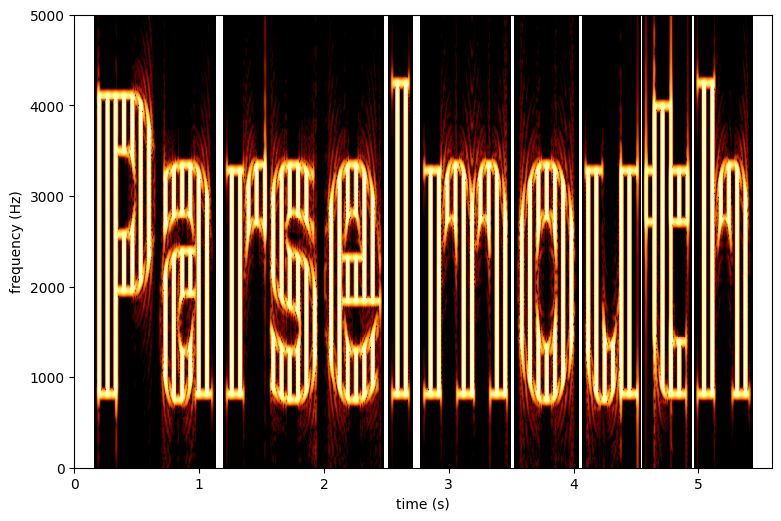

In [115]:
fig, ax = plt.subplots()
draw_spectrogram(ax, logospectrogram.to_spectrogram(window_length=0.03))
ax.set_xlim(logospectrogram.xmin, logospectrogram.xmax)

In [116]:
audio_player(logospectrogram_librosa)

/tmp/ipykernel_15265/1024322815.py:3: RuntimeWarning: divide by zero encountered in log10
  sg_db = 10 * np.log10(spectrogram.values)


(0.0, 5.574829931972789)

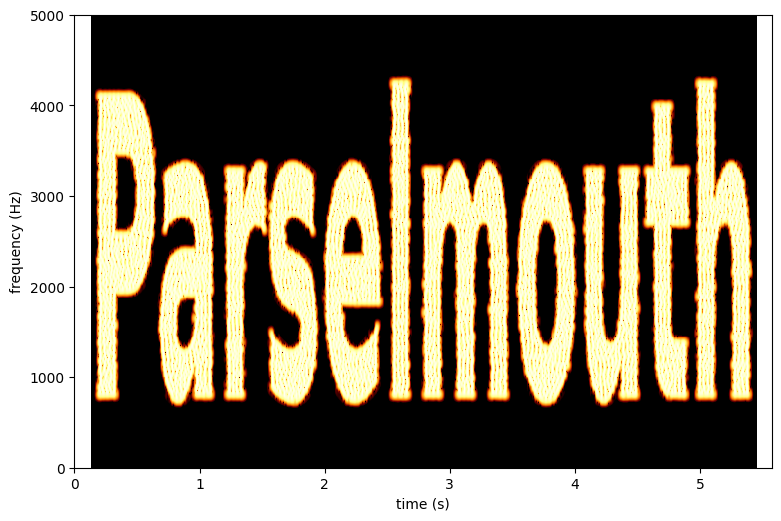

In [117]:
fig, ax = plt.subplots()
draw_spectrogram(ax, logospectrogram_librosa.to_spectrogram(window_length=0.03))
ax.set_xlim(logospectrogram_librosa.xmin, logospectrogram_librosa.xmax)

## Extra: interactive application demo

## That's all I have (in this tutorial)

**Questions or requests?**